In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

This note books purpose is to make me remember all the funny stuff i have learned like PyTorch, sklearn, feature_engine and connect the knowledge with API and model deployments

I will be working with sklearn simple data set - `breast cancer`

In [36]:
pip install feature-engine


Note: you may need to restart the kernel to use updated packages.


In [37]:
# Tools
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from feature_engine.transformation import YeoJohnsonTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import joblib
from sklearn.pipeline import Pipeline

# Modles
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

In [38]:
data = load_breast_cancer(as_frame=True)
X = data.data
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [39]:
y = data.target
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [40]:
whole_data = pd.concat([X, y], axis=1)
whole_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [41]:
whole_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Data are well formated, only numbers - I choose it on purpouse to make my life easier this time 

In [42]:
whole_data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [43]:
whole_data.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

No missing data

In [44]:
whole_data["target"].value_counts()

target
1    357
0    212
Name: count, dtype: int64

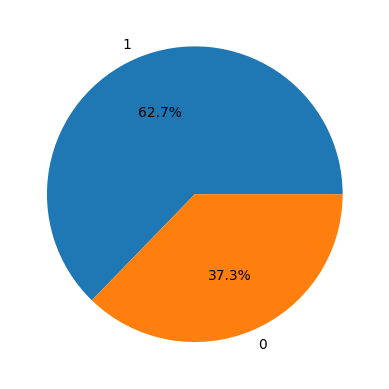

In [45]:
plt.pie(
    whole_data["target"].value_counts() * 100 / len(whole_data),
    labels=whole_data["target"].value_counts().index,
    autopct="%1.1f%%",
)
plt.show()

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


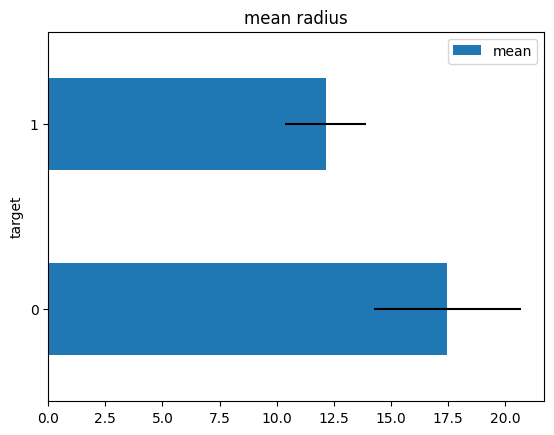

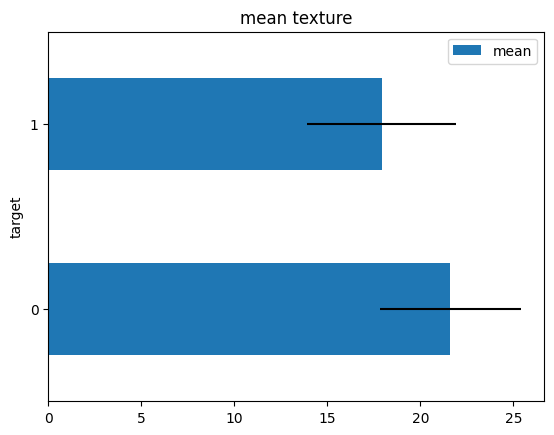

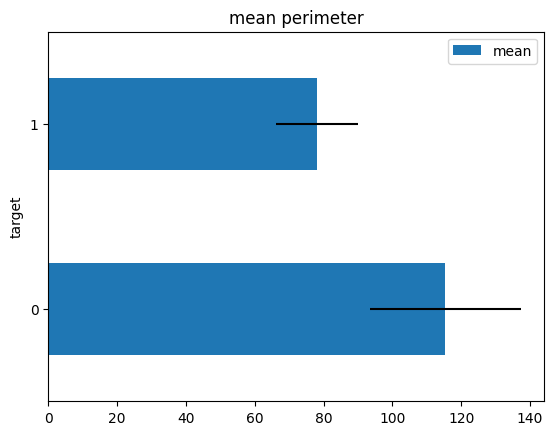

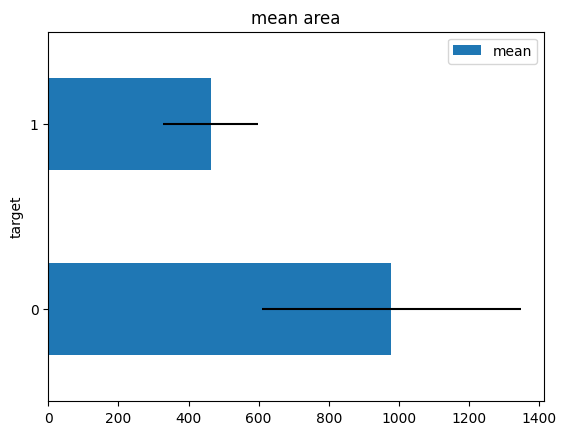

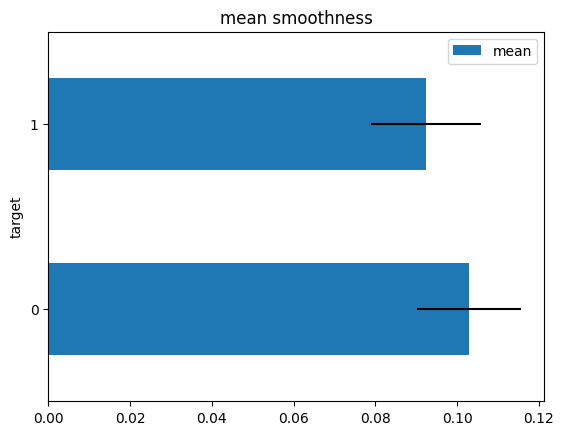

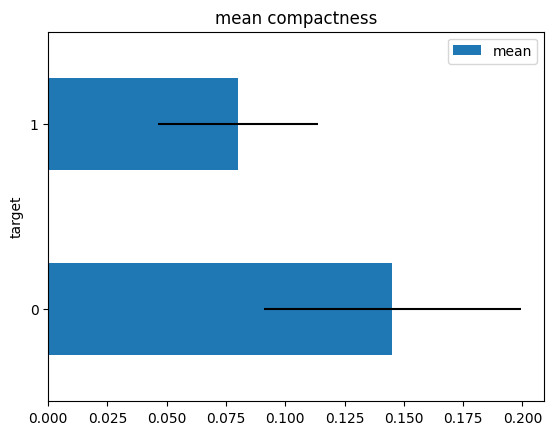

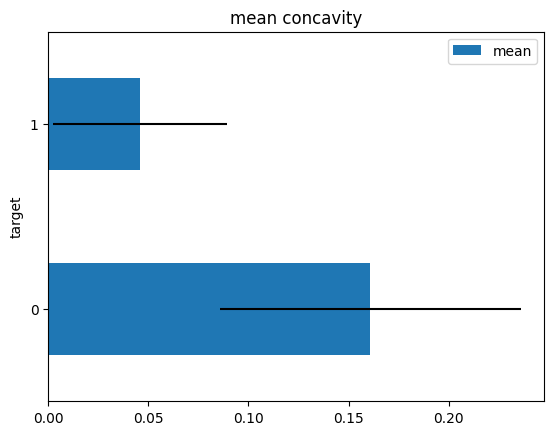

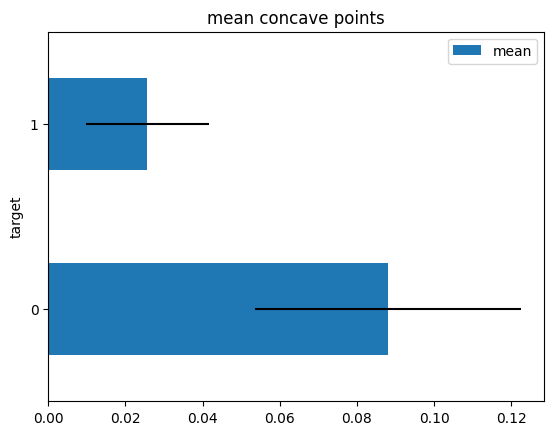

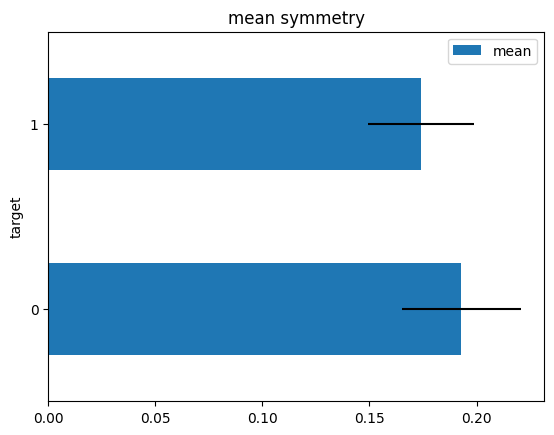

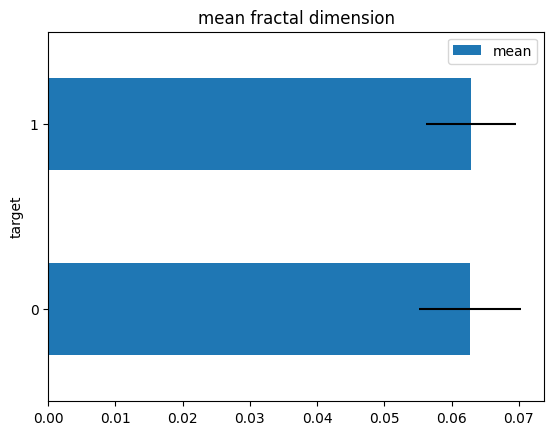

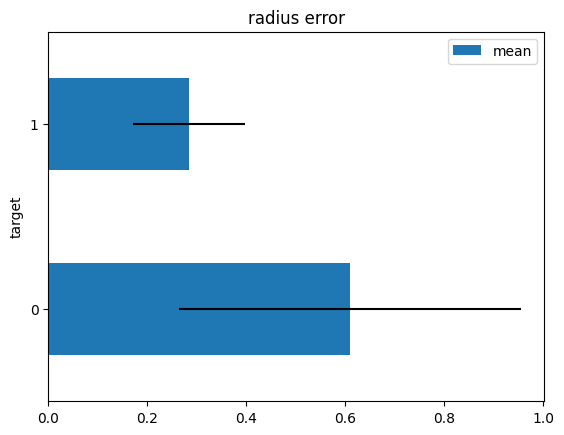

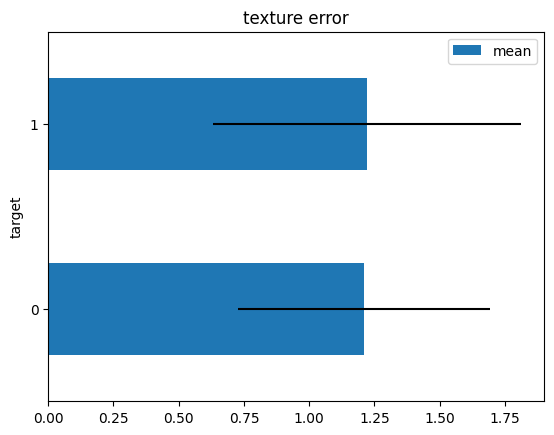

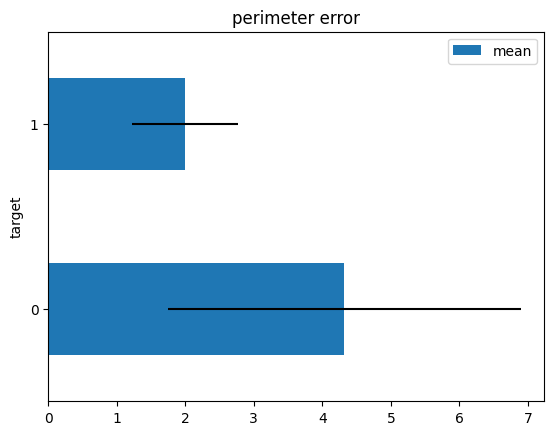

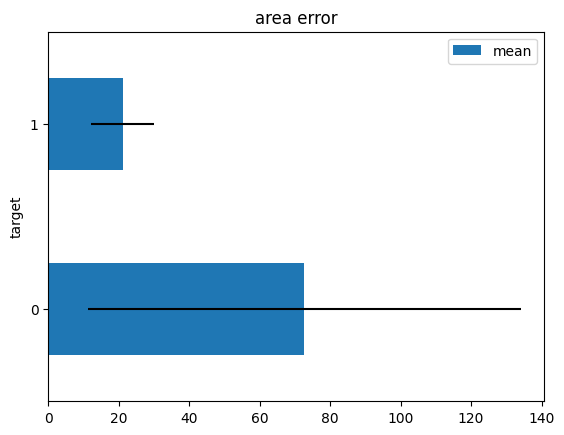

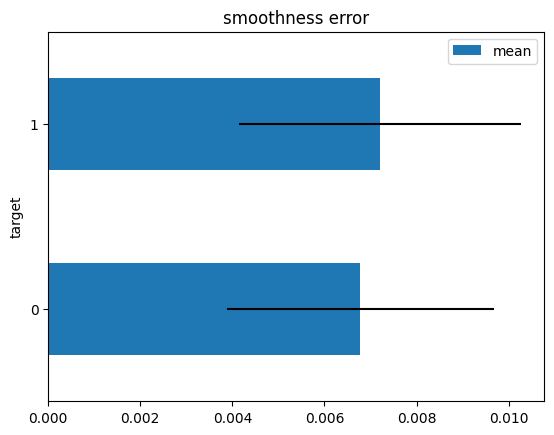

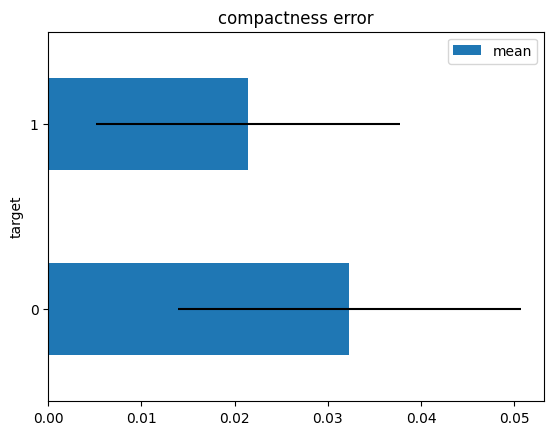

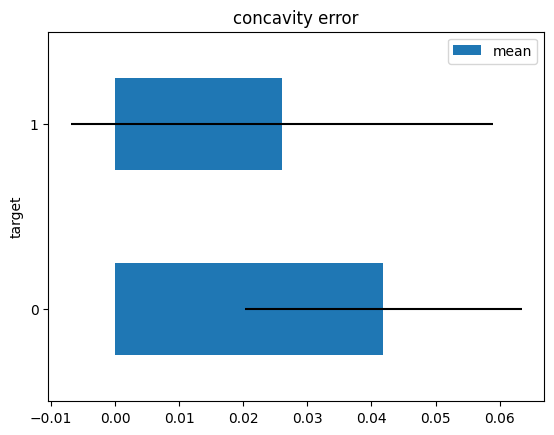

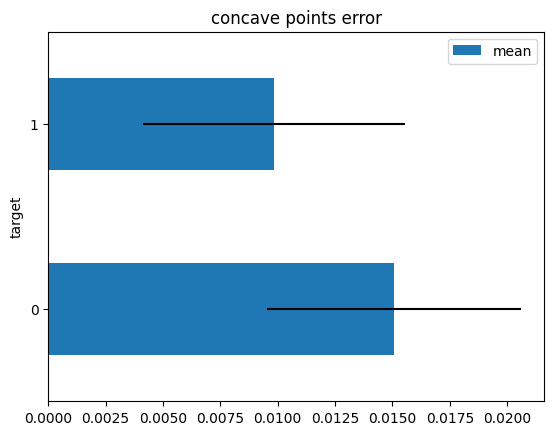

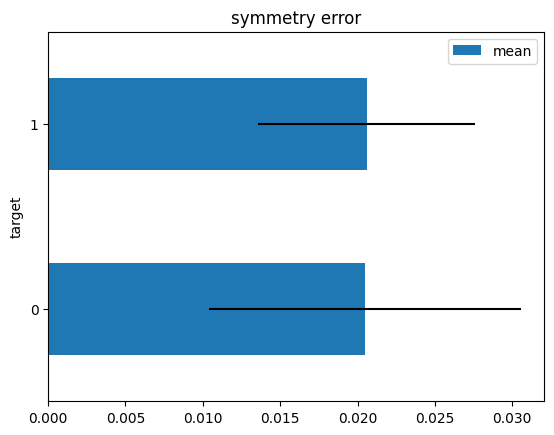

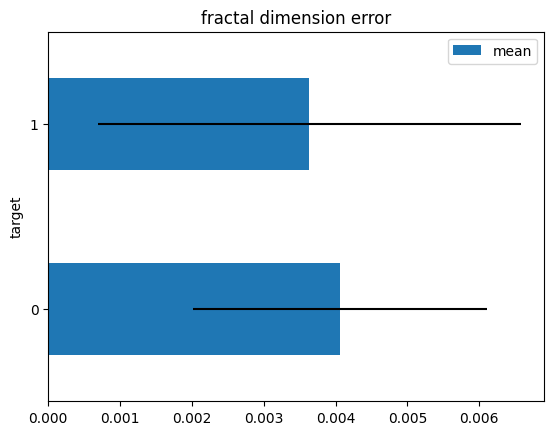

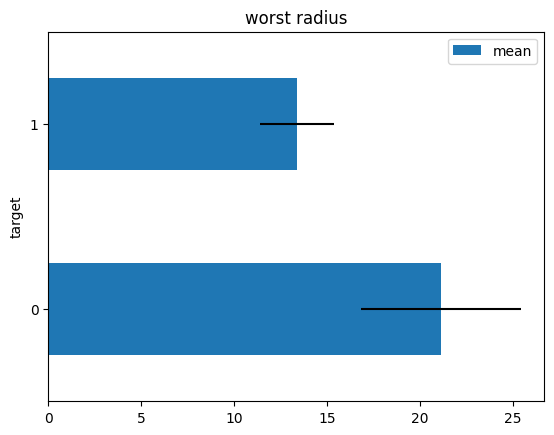

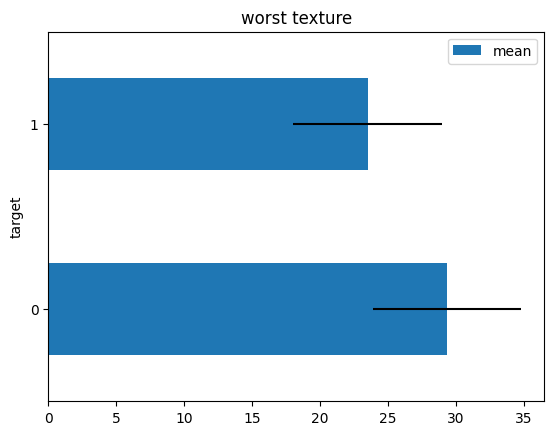

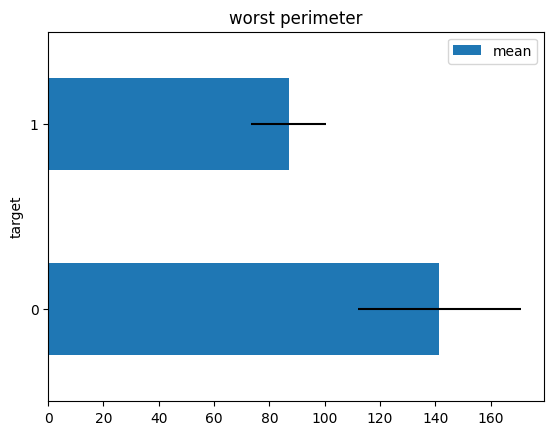

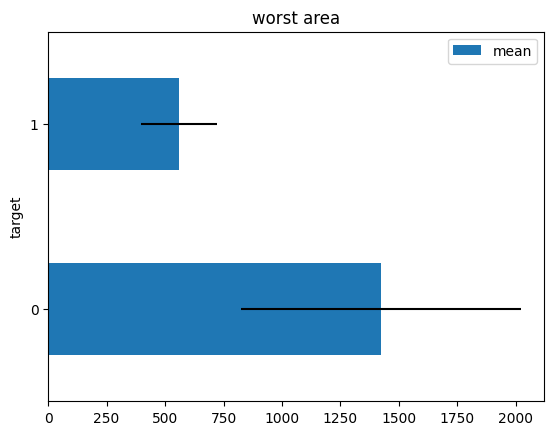

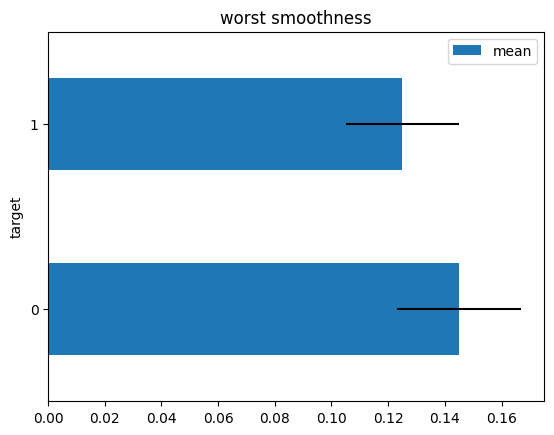

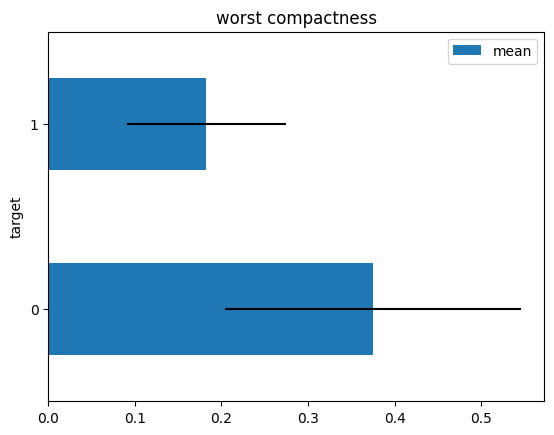

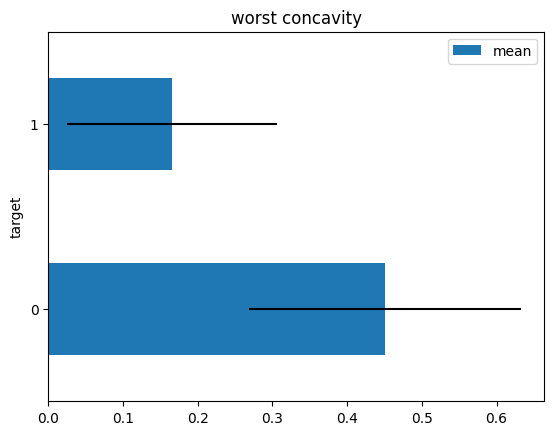

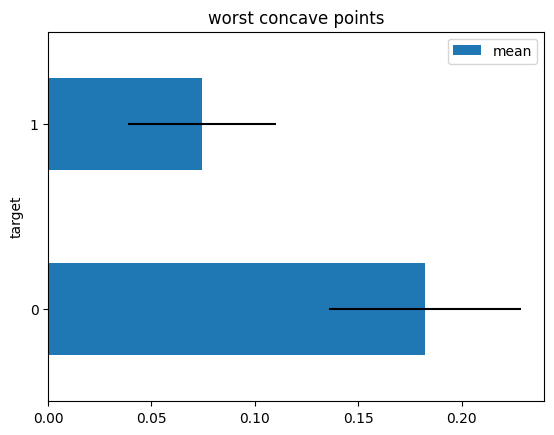

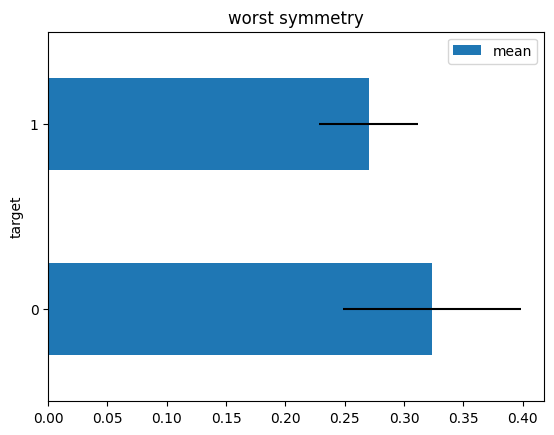

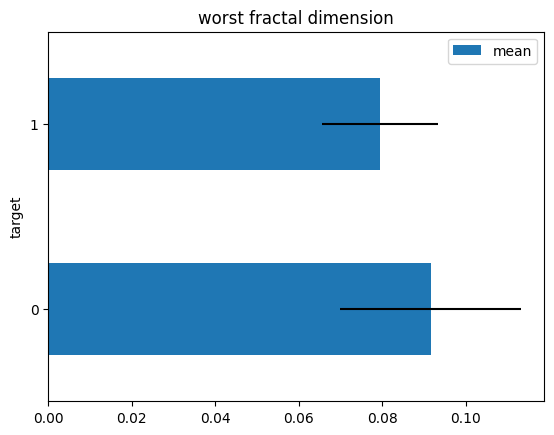

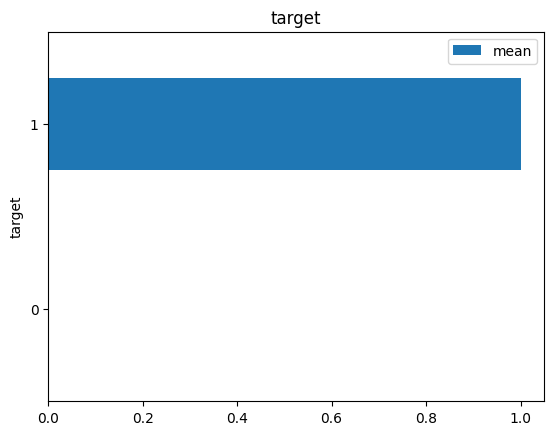

In [46]:
def influance_of_variable_on_target(variable):
    temp = whole_data.groupby("target")[variable].agg(["mean", "std"])

    temp.plot(kind="barh", y="mean", xerr="std", title=variable)


columns = whole_data.columns

for column in columns:
    influance_of_variable_on_target(column)

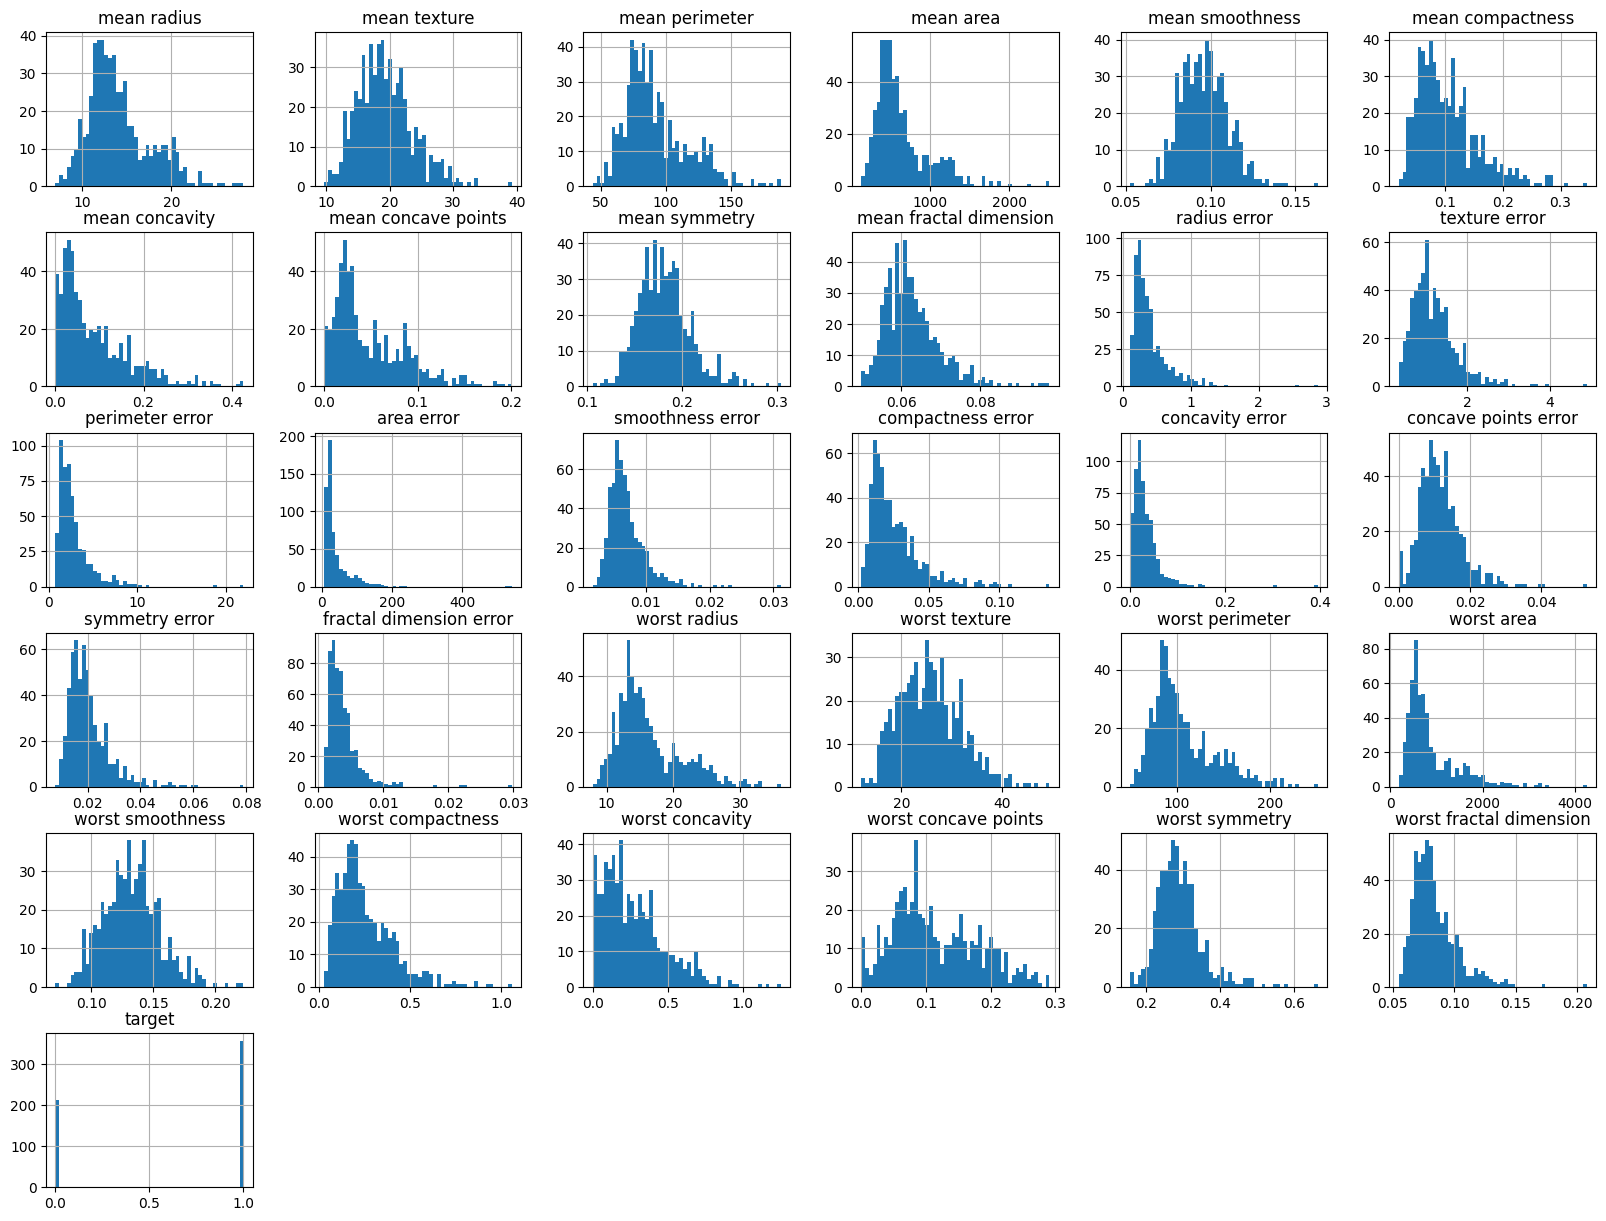

In [47]:
whole_data.hist(figsize=(20, 15), bins=50)
plt.show()

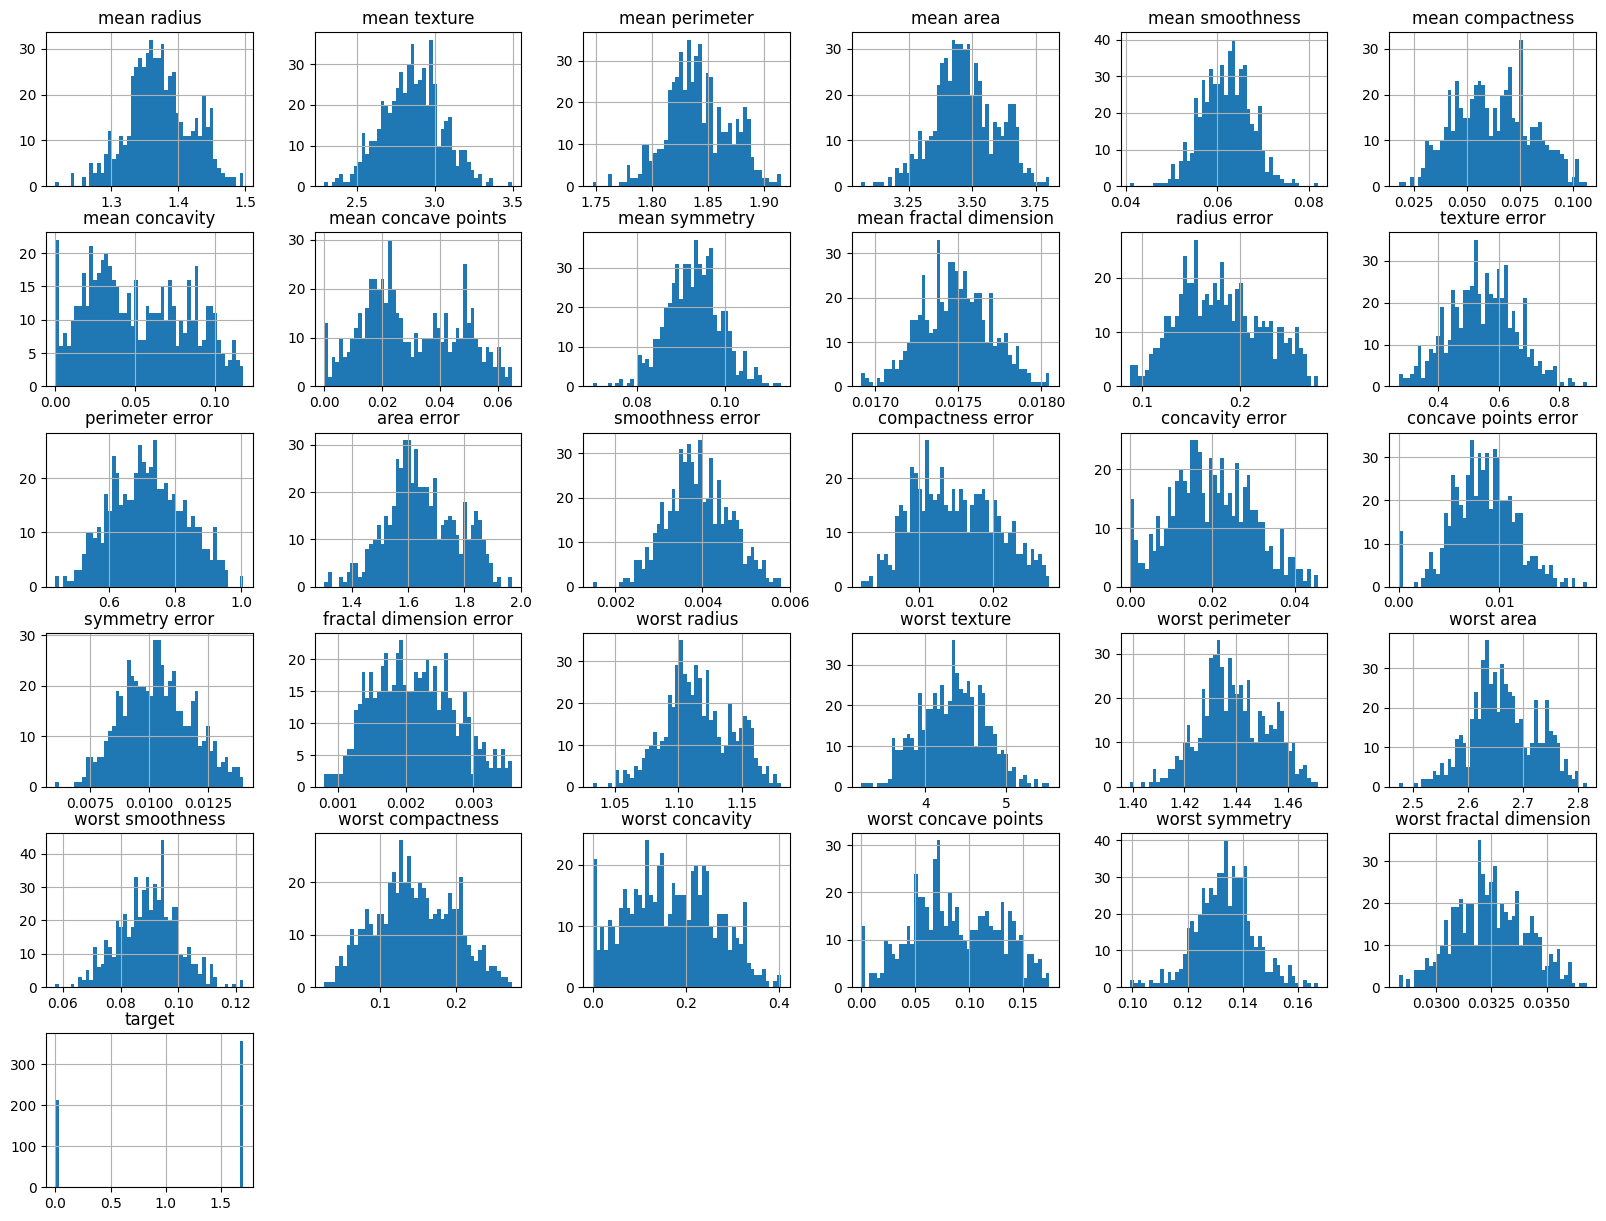

In [48]:
# compare data distribution after yeo-johnson transformation

yeo_transf = YeoJohnsonTransformer()
copy = whole_data.copy()
copy = yeo_transf.fit_transform(copy)
copy.hist(figsize=(20, 15), bins=50)
plt.show()

Data are more Gaussian

## Data preparation

###  Train test split


In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=41
)

###  Gaussian distribution


In [50]:
tf = YeoJohnsonTransformer()


# fit and transform X_train data and just transform X_test data
# We transform it into DataFrame in the future use!
X_train = pd.DataFrame(tf.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(tf.transform(X_test), columns=X_test.columns)

### Feature Scaling

In [51]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

### Feature selection 

In [52]:
# remember to set the seed, the random state in this function
sel_ = SelectFromModel(Lasso(alpha=0.001, random_state=41))

# train Lasso model and select features
sel_.fit(X_train, y_train)

,estimator,Lasso(alpha=0...ndom_state=41)
,threshold,None
,prefit,False
,norm_order,1
,max_features,None
,importance_getter,'auto'
,alpha,0.001
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000


In [53]:
sel_.get_support().sum()

20

In [54]:
selected_features = X_train.columns[(sel_.get_support())]
selected_features

Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean concavity', 'mean concave points', 'mean symmetry',
       'mean fractal dimension', 'texture error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'symmetry error', 'fractal dimension error', 'worst texture',
       'worst smoothness', 'worst compactness', 'worst symmetry',
       'worst fractal dimension'],
      dtype='object')

Now, lets reduce train and test set to only those feature we need ( thas why we used pd.DataFrame wraper so know we can by column name simply take what we need)


In [55]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

### Model choosing using cross_validation


In [56]:
models = {
    "LogReg": LogisticRegression(random_state=42, max_iter=300),
    "RF": RandomForestClassifier(random_state=42),
    "SVC": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SGD": SGDClassifier(random_state=42),
}

# We will use Stratify cross validation since we have some class inbalance
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
models_results = {}

for name, model in models.items():
    result = cross_val_score(
        model, X_train, y_train, scoring="accuracy", cv=cv, n_jobs=-1
    )
    models_results[name] = np.mean(result)

In [57]:
models_results

{'LogReg': 0.9758241758241759,
 'RF': 0.9472527472527472,
 'SVC': 0.9802197802197803,
 'KNN': 0.9538461538461538,
 'SGD': 0.964835164835165}

Best model is 'SVC'

In order to simplyfie I wont be doing Grid and RandomSearchCV to tiune model

### Train model 

In [58]:
model = SVC(random_state=42)
model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [59]:
y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_preds)
test_acc = accuracy_score(y_test, y_test_preds)

test_f1 = f1_score(y_test, y_test_preds, average="binary")

print(f"Train ACC: {train_acc}")
print(f"Test ACC : {test_acc}")
print(f"F1: {test_f1}")

Train ACC: 0.989010989010989
Test ACC : 1.0
F1: 1.0


**Key notes:**
- Model classified all test cases correctly
- both precision and recall are perfect

Offcourse in normal production this results would be highly suspicius.  I would have to condier overfitting, data leakage , not enought data or this is simple trivial problem to solve.
But on my current needs is ok to stick wiht that 

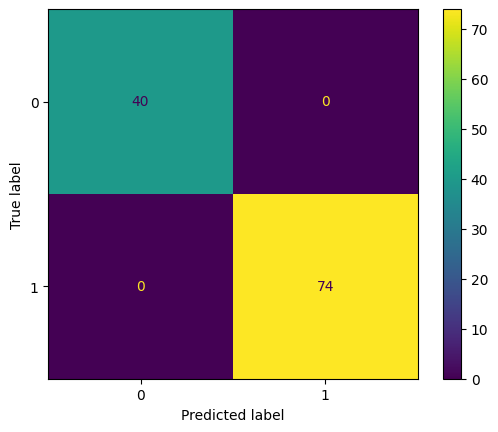

In [60]:
# Conff Metrics
cm = confusion_matrix(y_test, y_test_preds, labels=model.classes_)
matrix_display = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=model.classes_
)
matrix_display.plot()
plt.show()

### Save model  

In [61]:
joblib.dump(model, "SVC_simple_model.joblib")

['SVC_simple_model.joblib']

## Pipeline 
Next, its very important to create a pipeline
by doing so we can train, test, and develop new models and we reduce the risk of missing some steps out 

In [62]:
data = load_breast_cancer(as_frame=True)

X = data.data
y = data.target

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.2
)

### CONFIGURATION


In [63]:
SELECTED_FEATURES = [
    "mean radius",
    "mean texture",
    "mean smoothness",
    "mean compactness",
    "mean concavity",
    "mean concave points",
    "mean symmetry",
    "mean fractal dimension",
    "texture error",
    "area error",
    "smoothness error",
    "compactness error",
    "concavity error",
    "symmetry error",
    "fractal dimension error",
    "worst texture",
    "worst smoothness",
    "worst compactness",
    "worst symmetry",
    "worst fractal dimension",
]

In [64]:
X_train = X_train[SELECTED_FEATURES]
X_test = X_test[SELECTED_FEATURES]

### PIPELINE

In [66]:
pipeline = Pipeline(
    [
        # Variable transformation
        ("yeo_transf", YeoJohnsonTransformer()),
        # Scaling
        ("scaler", StandardScaler()),
        # Model
        ("SVC", SVC(random_state=42, probability=True)),
    ]
)

In [67]:
pipeline.fit(X_train, y_train)

,steps,"[('yeo_transf', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,variables,None
,copy,True
,with_mean,True
,with_std,True
,C,1.0
,kernel,'rbf'
,degree,3


### Evaluate pipeline 

In [68]:
preds = pipeline.predict(X_test)

acc = accuracy_score(y_test, preds)
acc

0.9649122807017544

In [74]:
preds[:10]

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1])

In [73]:
proba = pipeline.predict_proba(X_test)
proba[:10]

array([[5.02286556e-02, 9.49771344e-01],
       [9.99602907e-01, 3.97092729e-04],
       [9.99639773e-01, 3.60226552e-04],
       [3.31447331e-08, 9.99999967e-01],
       [1.38464182e-08, 9.99999986e-01],
       [9.99566425e-01, 4.33575297e-04],
       [9.99875181e-01, 1.24819437e-04],
       [6.95509627e-01, 3.04490373e-01],
       [3.07548242e-01, 6.92451758e-01],
       [4.96771920e-03, 9.95032281e-01]])

In [ ]:
joblib.dump(pipeline, "SVC_pipeline.joblib")